### Point

Creating point is easy, you pass x and y coordinates into Point() -object (+ possibly also z -coordinate):

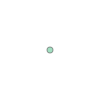

In [1]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)
point3D

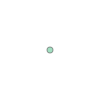

In [2]:
point1

In [3]:
print(point1)
print(point3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


In [4]:
type(point1)

shapely.geometry.point.Point

### Point attributes and functions

Points and other shapely objects have useful built-in attributes and methods. Using the available attributes, we can for example extract the coordinate values of a Point and calculate the Euclidian distance between points.

geom_type attribute contains information about the geometry type of the Shapely object:

In [5]:
point1.geom_type

'Point'

Extracting the coordinates of a Point can be done in a couple of different ways:

coords attribute contains the coordinate information as a CoordinateSequence which is another data type related to Shapely.

In [6]:
# point1.coords
list(point1.coords)

[(2.2, 4.2)]

Here we have a coordinate tuple inside a list. Using the attributes x and y it is possible to get the coordinates directly as plain decimal numbers.

In [7]:
# Read x and y coordinates separately
x = point1.x
y = point1.y

In [8]:
print(x)
print(y)

2.2
4.2


In [9]:
# Check input data
print(point1)
print(point2)

POINT (2.2 4.2)
POINT (7.2 -25.1)


It is also possible to calculate the distance between two objects using the distance method. In our example the distance is calculated in a cartesian coordinate system. When working with real GIS data the distance is based on the used coordinate reference system. always check what is the unit of measurement (for example, meters) in the coordinate reference system you are using.

Let’s calculate the distance between point1 and point2:

In [10]:
# Calculate the distance between point1 and point2
dist = point1.distance(point2)
# Print out a nicely formatted info message
print(f"The distance between the points is {dist}")

The distance between the points is 29.723559679150142


### LineString
Creating LineString -objects is fairly similar to creating Shapely Points.

Now instead using a single coordinate-tuple we can construct the line using either a list of shapely Point -objects or pass the points as coordinate-tuples:

In [11]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

In [12]:
# It is also possible to produce the same outcome using coordinate tuples
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [13]:
line == line2

True

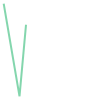

In [14]:
line

In [15]:
print(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


In [16]:
# Check data type of the line object
type(line)

shapely.geometry.linestring.LineString

In [17]:
# Check geometry type of the line object
line.geom_type

'LineString'

### LineString attributes and functions

LineString -object has many useful built-in attributes and functionalities. It is for instance possible to extract the coordinates or the length of a LineString (line), calculate the centroid of the line, create points along the line at specific distance, calculate the closest distance from a line to specified Point and simplify the geometry. See full list of functionalities from Shapely documentation. Here, we go through a few of them.

We can extract the coordinates of a LineString similarly as with Point

In [18]:
# Get xy coordinate tuples
line.coords
list(line.coords)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

Again, we have a list of coordinate tuples (x,y) inside a list.

If you would need to access all x-coordinates or all y-coordinates of the line, you can do it directly using the xy attribute:

In [19]:
# Extract x and y coordinates separately
# line.xy

# line.xy[0]
# list(line.xy[0])

# line.xy[1]
# list(line.xy[1])

xcoords = list(line.xy[0])
ycoords = list(line.xy[1])

In [20]:
print(xcoords)
print(ycoords)

[2.2, 7.2, 9.26]
[4.2, -25.1, -2.456]


It is possible to retrieve specific attributes such as lenght of the line and center of the line (centroid) straight from the LineString object itself:

In [21]:
# Get the length of the line
l_length = line.length
print(l_length)

52.46106912939557


In [24]:
# Get the centroid of the line
print(line.centroid)
# line

POINT (6.229961354035622 -11.892411157572392)


### Polygon

Creating a Polygon -object continues the same logic of how Point and LineString were created but Polygon object only accepts a sequence of coordinates as input.

Polygon needs at least three coordinate-tuples (three points are reguired to form a surface):

In [23]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

We can also use information from the Shapely Point objects created earlier, but we can’t use the point objects directly. Instead, we need to get information of the x,y coordinate pairs as a sequence. We can achieve this by using a list comprehension.

In [36]:
poly2 = Polygon([point1, point2, point3])

In [37]:
poly == poly2

True

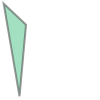

In [38]:
# Check that polygon objects created using two different approaches are identical
poly

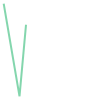

In [39]:
line

In [40]:
print(poly)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


In [41]:
# Data type
type(poly)

shapely.geometry.polygon.Polygon

In [42]:
# Geometry type
poly.geom_type

'Polygon'

In [43]:
# Check the help for Polygon objects
# help(Polygon)

Help on class Polygon in module shapely.geometry.polygon:

class Polygon(shapely.geometry.base.BaseGeometry)
 |  Polygon(shell=None, holes=None)
 |  
 |  A two-dimensional figure bounded by a linear ring
 |  
 |  A polygon has a non-zero area. It may have one or more negative-space
 |  "holes" which are also bounded by linear rings. If any rings cross each
 |  other, the feature is invalid and operations on it may fail.
 |  
 |  Attributes
 |  ----------
 |  exterior : LinearRing
 |      The ring which bounds the positive space of the polygon.
 |  interiors : sequence
 |      A sequence of rings which bound all existing holes.
 |  
 |  Method resolution order:
 |      Polygon
 |      shapely.geometry.base.BaseGeometry
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __init__(self, shell=None, holes=None)
 |      Parameters
 |      ----------
 |      shell : sequence
 |          A sequence of (x, y [,z]) numeric coo

Let’s see how we can create a Polygon with a hole:

In [44]:
# Define the outer border
border = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

In [45]:
# Outer polygon
world = Polygon(shell=border)
print(world)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))


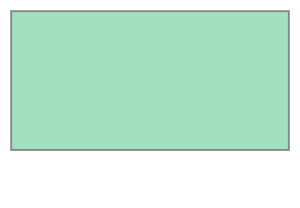

In [46]:
world

In [47]:
# Let's create a single big hole where we leave ten units at the boundaries
# Note: there could be multiple holes, so we need to provide list of coordinates for the hole inside a list
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

In [48]:
# Now we can construct our Polygon with the hole inside
frame = Polygon(shell=border, holes=hole)
print(frame)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


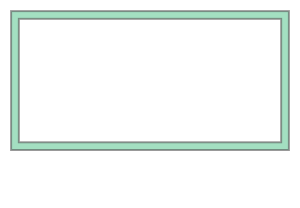

In [49]:
frame

As we can see the Polygon has now two different tuples of coordinates. The first one represents the outerior and the second one represents the hole inside of the Polygon.

### Polygon attributes and functions

We can again access different attributes directly from the Polygon object itself that can be really useful for many analyses, such as area, centroid, bounding box, exterior, and exterior-length. See a full list of methods in the Shapely User Manual.

Here, we can see a few of the available attributes and how to access them:

In [50]:
# Print the outputs
print(f"Polygon centroid: , {world.centroid}")
print(f"Polygon Area: , {world.area}")
print(f"Polygon Bounding Box: {world.bounds}")
print(f"Polygon Exterior: {world.exterior}")
print(f"Polygon Exterior Length: {world.length}")

Polygon centroid: , POINT (0 0)
Polygon Area: , 64800.0
Polygon Bounding Box: (-180.0, -90.0, 180.0, 90.0)
Polygon Exterior: LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Polygon Exterior Length: 1080.0


### Check your understanding

Plot these shapes using Shapely!

Pentagon, example coords: (30, 2.01), (31.91, 0.62), (31.18, -1.63), (28.82, -1.63), (28.09, 0.62)

Triangle

Square

Cicrle

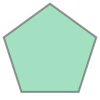

In [51]:
# Pentagon - Coordinates borrowed from this thread: https://tex.stackexchange.com/questions/179843/make-a-polygon-with-automatically-labelled-nodes-according-to-their-coordinates
Polygon([(30, 2.01), (31.91, 0.62), (31.18, -1.63), (28.82, -1.63), (28.09, 0.62)])

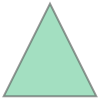

In [54]:
# Traingle
Polygon([(0,0), (2,4), (4,0)])
# Polygon([(0,0), (2,4), (2,0)])

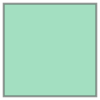

In [55]:
# Square
Polygon([(0,0), (0,4), (4,4), (4,0)])

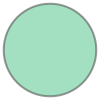

In [58]:
# Circle
point = Point((0,0))
point.buffer(1)